# KNN (k-nearest neighbour) Amazon reviews

In [210]:
import sqlite3
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets 
from sklearn import neighbors
from matplotlib.colors import ListedColormap
from sklearn import cross_validation
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
import scikitplot as skplt
from sklearn.metrics import f1_score

# Load data

In [211]:
#Data here used is preprocessed(deduplication,removal of html tags,punctuation,stop words,stemming)
con =sqlite3.connect(r'C:\Users\Friend\AI\AI_datasets\Amazon\cleaned_database.sqlite')
filtered_data  = pd.read_sql_query('SELECT * FROM Reviews WHERE Score != 3',con)
filtered_data = filtered_data.drop('index',axis = 1)

filtered_data = filtered_data.sort_values('Time')

# Sampling data

In [212]:
data = filtered_data.head(30000)
data.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text',
       'CleanedText'],
      dtype='object')

In [213]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(data['CleanedText'], data['Score'], test_size=0.3, random_state=0)
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(21000,) (21000,) (9000,) (9000,)


# BOW

In [214]:
# Performing BOW on review
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
vocabulary = count_vect.fit(X_train)

In [215]:
bag_of_words_train = count_vect.transform(X_train)
print(bag_of_words_train.shape)

(21000, 18506)


# 4-fold Cross Validation

In [216]:
#4 fold cross validation using kd-tree algorithm
myList = list(range(5,15))
k_values = list(filter(lambda x: x % 2 != 0, myList))

#claculate CV scores
f1_scores_bow = []
for k in k_values:
    knn = neighbors.KNeighborsClassifier(n_neighbors=k,algorithm = 'kd_tree')
    pred = cross_val_predict(knn, bag_of_words_train, y_train, cv=4)  
    tn, fp, fn, tp = confusion_matrix(y_train, pred).ravel()
    pr,re = (tp)/(tp+fp),(tp)/(tp+fn)
    score=(2*pr*re)/(pr+re)
    f1_scores_bow.append(score)

C:\Users\Friend\Anaconda3\lib\site-packages\sklearn\neighbors\base.py:212: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: "
C:\Users\Friend\Anaconda3\lib\site-packages\sklearn\neighbors\base.py:212: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: "
C:\Users\Friend\Anaconda3\lib\site-packages\sklearn\neighbors\base.py:212: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: "
C:\Users\Friend\Anaconda3\lib\site-packages\sklearn\neighbors\base.py:212: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: "
C:\Users\Friend\Anaconda3\lib\site-packages\sklearn\neighbors\base.py:212: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: "
C:\Users\Friend\Anaconda3

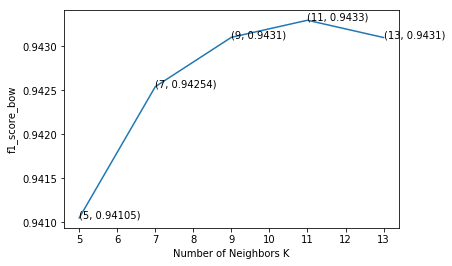

In [217]:
plt.plot(k_values,f1_scores_bow)
for xy in zip(k_values, np.round(f1_scores_bow,5)):
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')
plt.xlabel('Number of Neighbors K')
plt.ylabel('f1_score_bow')
plt.show()

In [218]:
#sELECTING K VALUE WITH MINIMUM ERROR
f1_score_bow_train = max(f1_scores_bow)
optimal_k_BOW = k_values[f1_scores_bow.index(max(f1_scores_bow))]
optimal_k_BOW

11

In [219]:
bag_of_words_test = count_vect.transform(X_test)
print(bag_of_words_test.shape)

(9000, 18506)


C:\Users\Friend\Anaconda3\lib\site-packages\sklearn\neighbors\base.py:212: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: "


f1 score is 0.9433562731604023


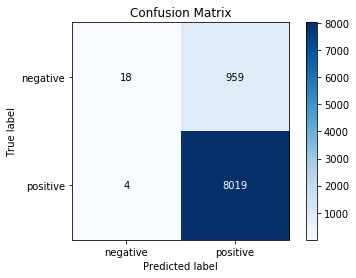

In [220]:
#Performing K-NN for optimal k-value using test data
knn_optimal = neighbors.KNeighborsClassifier(n_neighbors=optimal_k_BOW,algorithm = 'kd_tree')
knn_optimal.fit(bag_of_words_train, y_train)

#predicting using test data
pred = knn_optimal.predict(bag_of_words_test)
tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel()
pr,re = (tp)/(tp+fp),(tp)/(tp+fn)
f1_score_bow_test = (2*pr*re)/(pr+re)
print('f1 score is',f1_score_bow_test)

#plot confusion matrix
skplt.metrics.plot_confusion_matrix(y_test, pred, normalize=False)

# tfidf

In [221]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf_idf_vect = TfidfVectorizer(ngram_range=(1,2))
vocabulary = tf_idf_vect.fit(X_train)

In [222]:
tf_idf_train = tf_idf_vect.transform(X_train)
print(tf_idf_train.shape)

(21000, 379449)


# 4-fold Cross Validation

In [223]:
#4 fold cross validation using kd-tree algorithm
myList = list(range(5,15))
k_values = list(filter(lambda x: x % 2 != 0, myList))

f1_scores_tfidf_train = []
for k in k_values:
    knn = neighbors.KNeighborsClassifier(n_neighbors=k,alg[orithm = 'kd_tree')
    pred = cross_val_predict(knn, tf_idf_train, y_train, cv=4)  
    tn, fp, fn, tp = confusion_matrix(y_train, pred).ravel()
    pr,re = (tp)/(tp+fp),(tp)/(tp+fn)
    score=(2*pr*re)/(pr+re)
    f1_scores_tfidf_train.append(score)

C:\Users\Friend\Anaconda3\lib\site-packages\sklearn\neighbors\base.py:212: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: "
C:\Users\Friend\Anaconda3\lib\site-packages\sklearn\neighbors\base.py:212: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: "
C:\Users\Friend\Anaconda3\lib\site-packages\sklearn\neighbors\base.py:212: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: "
C:\Users\Friend\Anaconda3\lib\site-packages\sklearn\neighbors\base.py:212: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: "
C:\Users\Friend\Anaconda3\lib\site-packages\sklearn\neighbors\base.py:212: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: "
C:\Users\Friend\Anaconda3

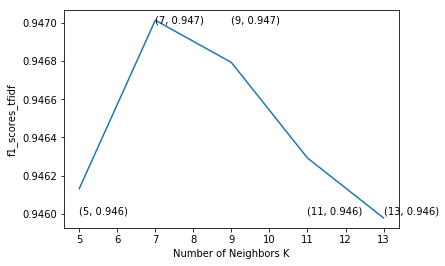

In [224]:
plt.plot(k_values,f1_scores_tfidf_train)
for xy in zip(k_values, np.round(f1_scores_tfidf_train,3)):
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')
plt.xlabel('Number of Neighbors K')
plt.ylabel('f1_scores_tfidf')
plt.show()

In [225]:
#sELECTING K VALUE WITH MINIMUM ERROR
f1_score_tfidf_train = max(f1_scores_tfidf_train)
optimal_k_tfidf = k_values[f1_scores_tfidf_train.index(max(f1_scores_tfidf_train))]
optimal_k_tfidf

7

In [226]:
tf_idf_test = tf_idf_vect.transform(X_test)
print(tf_idf_test.shape)

(9000, 379449)


C:\Users\Friend\Anaconda3\lib\site-packages\sklearn\neighbors\base.py:212: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: "


f1 score is 0.9471684672919388


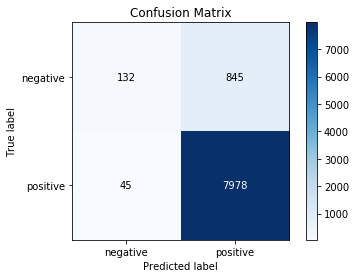

In [227]:
#Performing K-NN for optimal k-value using test data
knn_optimal = neighbors.KNeighborsClassifier(n_neighbors=optimal_k_tfidf,algorithm = 'kd_tree')
knn_optimal.fit(tf_idf_train, y_train)

#predicting using test data
pred = knn_optimal.predict(tf_idf_test)
tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel()
pr,re = (tp)/(tp+fp),(tp)/(tp+fn)
f1_score_tfidf_test = (2*pr*re)/(pr+re)
print('f1 score is',f1_score_tfidf_test)

#plot confusion matrix
skplt.metrics.plot_confusion_matrix(y_test, pred, normalize=False)

# KNN - Avgword2vec

In [228]:
from gensim.models import Word2Vec

i=0
list_of_sent=[]
for sent in X_train:
    list_of_sent.append(sent.split())

#word2vec
w2v_model=Word2Vec(list_of_sent,min_count=5,size=50, workers=4)
w2v_words = list(w2v_model.wv.vocab)

#Average word2vec
sent_vectors_train = []; 
for sent in list_of_sent: 
    sent_vec = np.zeros(50) 
    cnt_words =0; 
    for word in sent: 
        if word in w2v_words:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    sent_vectors_train.append(sent_vec)

# 4-fold Cross Validation

In [229]:
#4 fold cross validation using kd-tree algorithm
myList = list(range(5,15))
k_values = list(filter(lambda x: x % 2 != 0, myList))

#claculate CV scores
f1_scores_word2vec_train = []
for k in k_values:
    knn = neighbors.KNeighborsClassifier(n_neighbors=k,algorithm = 'kd_tree')
    pred = cross_val_predict(knn, sent_vectors_train, y_train, cv=4)  
    tn, fp, fn, tp = confusion_matrix(y_train, pred).ravel()
    pr,re = (tp)/(tp+fp),(tp)/(tp+fn)
    score=(2*pr*re)/(pr+re)
    f1_scores_word2vec_train.append(score)

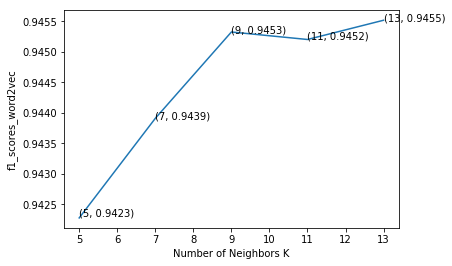

In [230]:
plt.plot(k_values,f1_scores_word2vec_train)
for xy in zip(k_values, np.round(f1_scores_word2vec_train,4)):
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')
plt.xlabel('Number of Neighbors K')
plt.ylabel('f1_scores_word2vec')
plt.show()

In [231]:
#Considering k value with maximum f1-score
f1_score_word2vec_train = max(f1_scores_word2vec_train)
optimal_k_Word2Vec = k_values[f1_scores_word2vec_train.index(max(f1_scores_word2vec_train))]
optimal_k_Word2Vec

13

In [232]:
from gensim.models import Word2Vec

i=0
list_of_sent=[]
for sent in X_test:
    list_of_sent.append(sent.split())

#Average word2vec
sent_vectors_test = []; 
for sent in list_of_sent: 
    sent_vec = np.zeros(50) 
    cnt_words =0; 
    for word in sent: 
        if word in w2v_words:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    sent_vectors_test.append(sent_vec)

f1 score is 0.9461533884690903


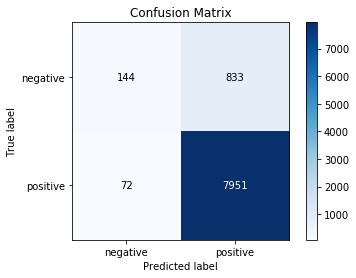

In [233]:
#Performing K-NN for optimal k-value using test data
knn_optimal = neighbors.KNeighborsClassifier(n_neighbors=optimal_k_Word2Vec,algorithm = 'kd_tree')
knn_optimal.fit(sent_vectors_train, y_train)

#predicting using test data
pred = knn_optimal.predict(sent_vectors_test)
tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel()
pr,re = (tp)/(tp+fp),(tp)/(tp+fn)
f1_score_word2vec_test = (2*pr*re)/(pr+re)
print('f1 score is',f1_score_word2vec_test)

#plot confusion matrix
skplt.metrics.plot_confusion_matrix(y_test, pred, normalize=False)

# KNN - tfidf weighted word2vec

In [236]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf_idf_vect = TfidfVectorizer(ngram_range=(1,2))
vocabulary = tf_idf_vect.fit(X_train)
tf_idf_train = tf_idf_vect.transform(X_train)

In [240]:
print(tf_idf_train.shape)

(21000, 379449)


In [ ]:
import gensim

i=0
list_of_sent=[]
for sent in X_train:
    list_of_sent.append(sent.split())

#get tf_idf
tfidf_feat = tf_idf_vect.get_feature_names()
tfidf_sent_vectors_train = []; 

#word2vec
w2v_model =Word2Vec(list_of_sent,min_count=5,size=50, workers=4)
w2v_words = list(w2v_model.wv.vocab)

#tfidf wieghted vector
row=0;
for sent in list_of_sent: 
    sent_vec = np.zeros(50) 
    weight_sum =0; 
    for word in sent: 
        if word in w2v_words:
            vec = w2v_model.wv[word]            
            tf_idf = tf_idf_train[row, tfidf_feat.index(word)]
            sent_vec += (vec * tf_idf)
            weight_sum += tf_idf
        else:
            continue
    if weight_sum != 0:
        sent_vec /= weight_sum
    tfidf_sent_vectors_train.append(sent_vec)
    row += 1

# 4-fold Cross Validation

In [242]:
#4 fold cross validation using kd-tree algorithm
myList = list(range(5,20))
k_values = list(filter(lambda x: x % 2 != 0, myList))

#claculate CV scores
f1_scores_tfidf_ww_train = []
for k in k_values:
    knn = neighbors.KNeighborsClassifier(n_neighbors=k,algorithm = 'kd_tree')
    pred = cross_val_predict(knn, tfidf_sent_vectors_train, y_train, cv=4)  
    tn, fp, fn, tp = confusion_matrix(y_train, pred).ravel()
    pr,re = (tp)/(tp+fp),(tp)/(tp+fn)
    score=(2*pr*re)/(pr+re)
    f1_scores_tfidf_ww_train.append(score)

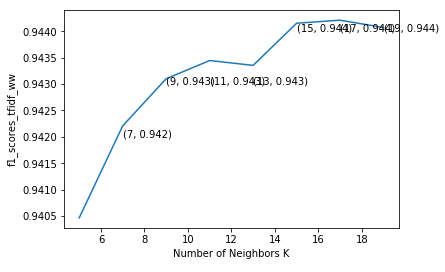

In [244]:
plt.plot(k_values,f1_scores_tfidf_ww_train)
for xy in zip(k_values, np.round(f1_scores_tfidf_ww_train,3)):
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')
plt.xlabel('Number of Neighbors K')
plt.ylabel('f1_scores_tfidf_ww')
plt.show()

In [245]:
#Considering k value with maximum f1-score
f1_score_tfidf_ww_train = max(f1_scores_tfidf_ww_train)
optimal_k_tfidfww = k_values[f1_scores_tfidf_ww_train.index(max(f1_scores_tfidf_ww_train))]
optimal_k_tfidfww

17

In [246]:
tf_idf_test = tf_idf_vect.transform(X_test)
print(tf_idf_test.shape)

(9000, 379449)


In [ ]:
import gensim

i=0
list_of_sent=[]
for sent in X_test:
    list_of_sent.append(sent.split())

#get tf_idf
tfidf_feat = tf_idf_vect.get_feature_names()
tfidf_sent_vectors_test = []; 

#tfidf wieghted vector
row=0;
for sent in list_of_sent: 
    sent_vec = np.zeros(50) 
    weight_sum =0; 
    for word in sent: 
        if word in w2v_words:
            vec = w2v_model.wv[word]            
            tf_idf = tf_idf_test[row, tfidf_feat.index(word)]
            sent_vec += (vec * tf_idf)
            weight_sum += tf_idf
        else:
            continue
    if weight_sum != 0:
        sent_vec /= weight_sum
    tfidf_sent_vectors_test.append(sent_vec)
    row += 1

f1 score is 0.9458898832454218


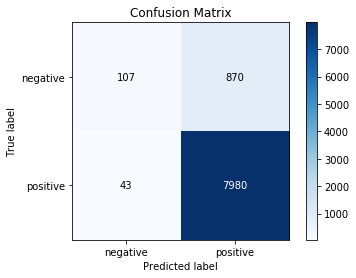

In [249]:
#Performing K-NN for optimal k-value using test data
knn_optimal = neighbors.KNeighborsClassifier(n_neighbors=optimal_k_tfidfww,algorithm = 'kd_tree')
knn_optimal.fit(tfidf_sent_vectors_train, y_train)

#predicting using test data
pred = knn_optimal.predict(tfidf_sent_vectors_test)
tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel()
pr,re = (tp)/(tp+fp),(tp)/(tp+fn)
f1_score_tfidf_ww_test = (2*pr*re)/(pr+re)
print('f1 score is',f1_score_tfidf_ww_test)

#plot confusion matrix
skplt.metrics.plot_confusion_matrix(y_test, pred, normalize=False)

# Conclusion

In [250]:
from prettytable import PrettyTable
    
Table = PrettyTable()

Table.field_names  = ["Model", "Hyper_parameter(K)", "Train f1-score", "Test f1-score"]

Table.add_row(["BOW", optimal_k_BOW, f1_score_bow_train,f1_score_bow_test])
Table.add_row(["TF_IDF", optimal_k_tfidf, f1_score_tfidf_train,f1_score_tfidf_test])
Table.add_row(["Avg Word2Vec", optimal_k_Word2Vec,f1_score_word2vec_train, f1_score_word2vec_test])
Table.add_row(["TF_IDF_wieghted_Word2Vec", optimal_k_tfidfww, f1_score_tfidf_ww_train,f1_score_tfidf_ww_test])

print(Table)

+--------------------------+--------------------+--------------------+--------------------+
|          Model           | Hyper_parameter(K) |   Train f1-score   |   Test f1-score    |
+--------------------------+--------------------+--------------------+--------------------+
|           BOW            |         11         | 0.9432983198569234 | 0.9433562731604023 |
|          TF_IDF          |         7          | 0.9470129738238505 | 0.9471684672919388 |
|       Avg Word2Vec       |         13         | 0.9455183640248245 | 0.9461533884690903 |
| TF_IDF_wieghted_Word2Vec |         17         | 0.9442105797027945 | 0.9458898832454218 |
+--------------------------+--------------------+--------------------+--------------------+
